## Research of bank customers churn data

Bank data has a flat structure. It is a CSV file with the following attributes:
- RowNumber: number of the row in the table (irrelevant for the research)
- CustomerId: customer identifier
- Surname: customer surname
- CreditScore: customer credit score. The higher the value is, the better
- Geography: customer country
- Gender: customer gender
- Age: customer age
- Tenure: the number of years the customer is with the bank
- Balance: customer account balance in dollars
- NumOfProducts: number of products which the customer is using in the bank
- HasCrCard: indication if the customer has a credit card
- IsActiveMember: indication if the customer is currently actively using the bank account
- EstimatedSalary: estimated customer salary
- Exited: indication if the customer has already exited the relationship with the bank

In [1]:
# Import necessary libraries

import pandas as pd
import plotly.express as px


In [2]:
# Load data

churn_data = pd.read_csv('../../data/churn.csv')
display(churn_data)
churn_data.info()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


I keep the last two lines in the cell above as a help on the structure of the data to be analyzed.

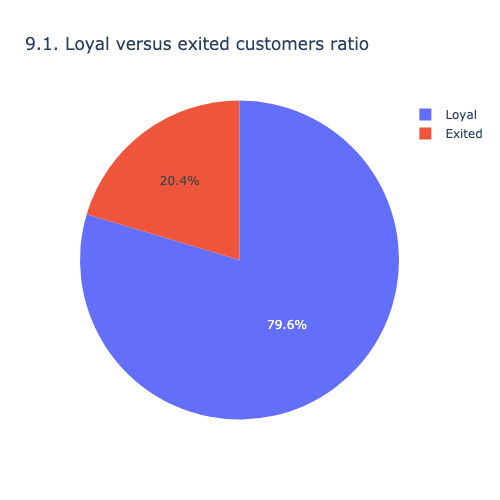

In [3]:
# 9.1. What is the ratio between the exited and the loyal customers? Present it as a chart and give your comments to this ratio.

exited_vs_loyal = churn_data.groupby('Exited', as_index=False)['Exited'].count()
# Add values for the label as data series.
exited_vs_loyal['Label'] = ['Loyal', 'Exited']

fig = px.pie(
    data_frame=exited_vs_loyal,
    values='Exited',
    names='Label',
    width=500,
    height=500,
    title='9.1. Loyal versus exited customers ratio'
)
fig.show('png')

Around 20 % of the customers exited the relationship with the bank. That is a relatively high number and it must be investigated in detail what leads to this high ratio.

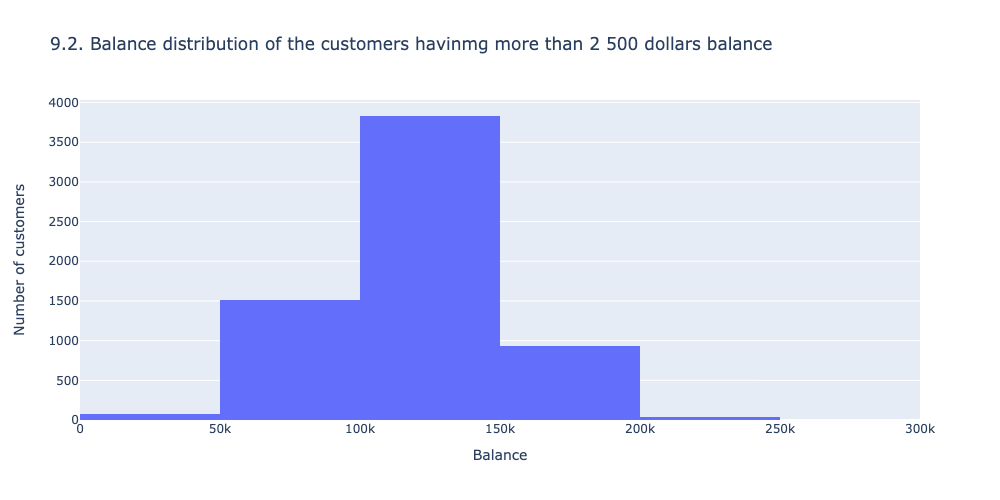

In [4]:
# 9.2. Build a chart representing a distribution of the customers' balances for customers having a balance of more than 2500 dollars.
# Describe the distribution and make conclusions.

balance_distribution = churn_data[churn_data['Balance'] > 2500]

fig = px.histogram(
    data_frame=balance_distribution,
    x='Balance',
    nbins=6,
    width=1000,
    height=500,
    title='9.2. Balance distribution of the customers havinmg more than 2 500 dollars balance',
).update_layout(
    yaxis_title='Number of customers'
)
fig.show('png')

I have divided the customers into 6 buckets, each of 50 000 dollars. Based on the chart the received distribution looks like a normal distribution.

None of the customers has more than 300 000 dollars on the bank account.

The category which has the largest amount of customers is in the range of 100 000 and 150 000 dollars.

It is very strange that so few people are in the range between 2 500 and 50 000. My expectation would be that the most amount is between 2 500 and 50 000. The following categories should have descending number of customers eventually going down to 0.

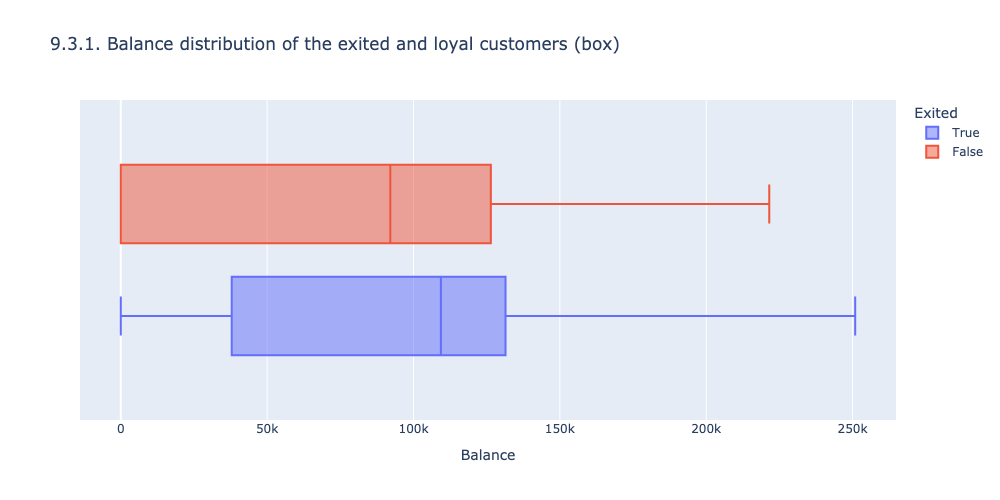

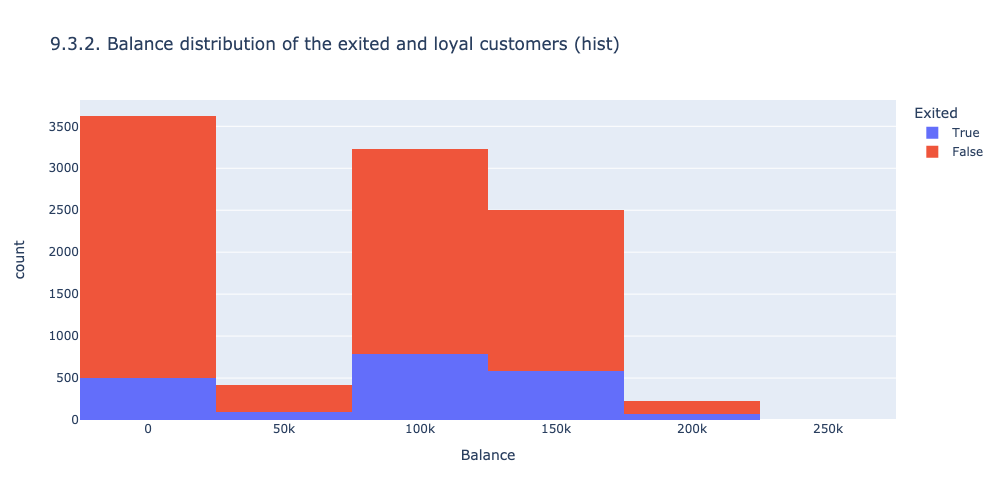

In [5]:
# 9.3. Look at the customers' balances distribution from the churn point of view. What are the differences between the balances of exited 
# and loyal customers?
# Think and write down your assumptions on what could be the exit reason for the exited customers.

# Converting to bool for more appropriate description in the legend.
churn_data['Exited'] = churn_data['Exited'].astype('bool')

fig = px.box(
    data_frame=churn_data,
    x='Balance',
    color='Exited',
    width=1000,
    height=500,
    title='9.3.1. Balance distribution of the exited and loyal customers (box)'
)
fig.show('png')

fig = px.histogram(
    data_frame=churn_data,
    x='Balance',
    color='Exited',
    nbins=6,
    width=1000,
    height=500,
    title='9.3.2. Balance distribution of the exited and loyal customers (hist)',
)
fig.show('png')

On the firest chart we can see that the half of the exiters had the balance between around 40 000 and 130 000 dollars, having the median, 75% quantile and the max values higher than those of the loyal customers.
On the second chart we can see that for the customers having 0 dollars balance, the ratio of exits is lower than for 100k or 150k.

I can assume that the bank has good conditions for new customers and for credits, but not for those who hold a savings account.

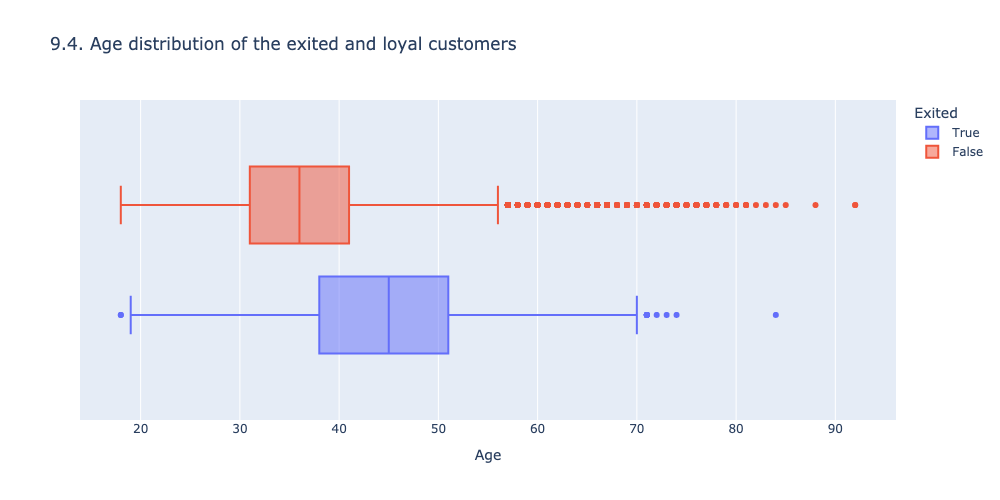

In [6]:
# 9.4. Take a look at the age distribution from the churn point of view.
# Which group has more potential outliers? At which age range the bank should pay attention?

fig = px.box(
    data_frame=churn_data,
    x='Age',
    color='Exited',
    width=1000,
    height=500,
    title='9.4. Age distribution of the exited and loyal customers'
)
fig.show('png')

The group of the loyal customers has more potential outliers. But nevertheless the age distribution shows that 50 % of the exiters belong to the age range between 38 and 51 years old. 50 % of the loyal customers are in the age range between 31 and 41 years old. I would recommend the bank to pay attention with the highest priority to the age range between 38 and 41 years old. The next priority would be customers older than 41 years old.

This chart confirms my assumption from the chart 9.3. With the age people are getting some savings. So, the facts that older people and people with savings are more likely to leave the bank confirm that bank does not offer good conditions for those. 

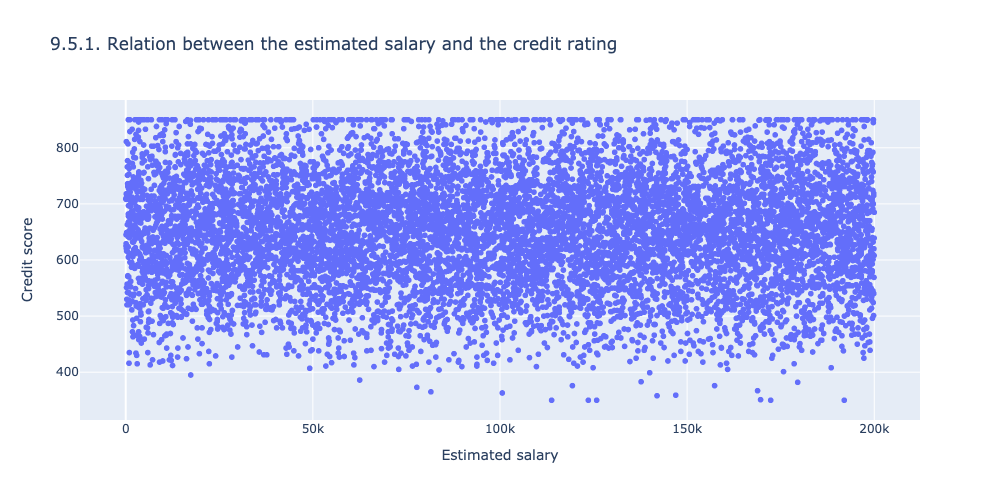

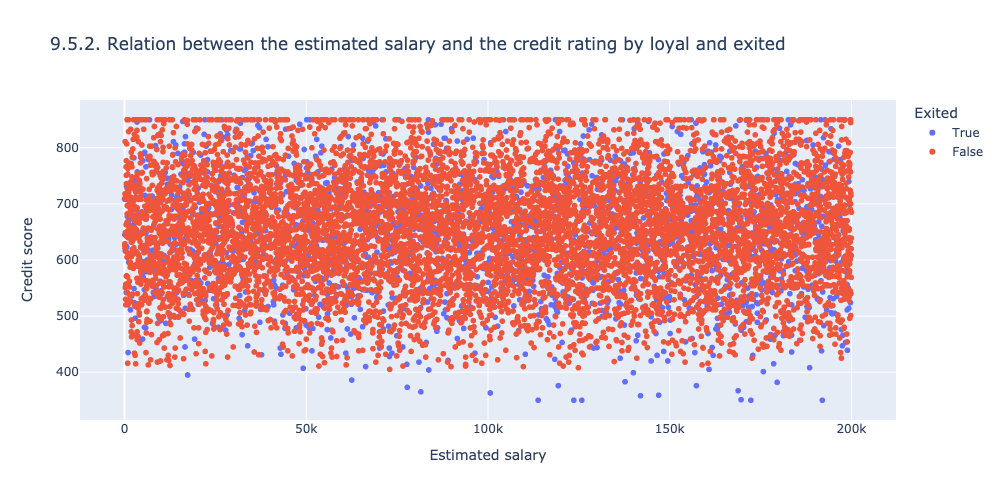

In [7]:
# 9.5. Build a chart representing a relation between the customer credit score and estimated salary.
# Add color differentiation by churn. What is the relation between these two attributes? If there is no explicit relation, mention this.

fig = px.scatter(
    data_frame=churn_data,
    x='EstimatedSalary',
    y='CreditScore',
    width=1000,
    height=500,
    title='9.5.1. Relation between the estimated salary and the credit rating'
).update_layout(
    xaxis_title='Estimated salary',
    yaxis_title='Credit score'
)
fig.show('png')

fig = px.scatter(
    data_frame=churn_data,
    x='EstimatedSalary',
    y='CreditScore',
    color='Exited',
    width=1000,
    height=500,
    title='9.5.2. Relation between the estimated salary and the credit rating by loyal and exited'
).update_layout(
    xaxis_title='Estimated salary',
    yaxis_title='Credit score'
)
fig.show('png')

Neither within a direct dependency of estimated salary and credit score, nor colored by exited customers, the is no any visual dependency between the estimated salary and the credit score. For any estimated salary the majority of the credit scores lies in the interval between 550 and 750. 

Unrelated to the estimated salary we can observe that all of the customer relationships have been exited for the customers with the credi rating below 400.

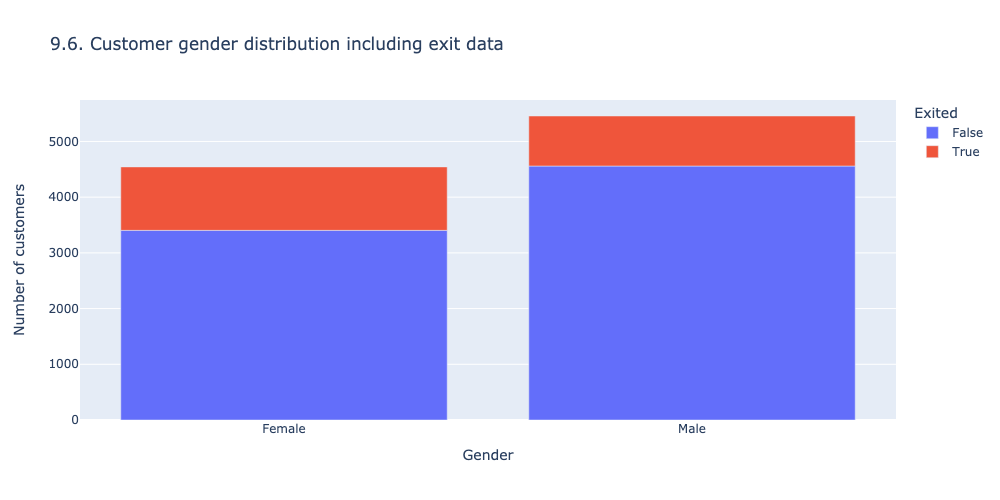

In [8]:
# 9.6. Who is exiting more frequently men or women? Build a chart which illustrates this.

gender_data = churn_data.groupby(['Gender', 'Exited'], as_index=False)['RowNumber'].count()

fig = px.bar(
    data_frame=gender_data,
    x='Gender',
    y='RowNumber',
    color='Exited',
    width=1000,
    height=500,
    title='9.6. Customer gender distribution including exit data'
).update_layout(
    yaxis_title='Number of customers'
)
fig.show('png')

The chart above shows that women are exiting more often in both relative and absolute numbers compared to men.

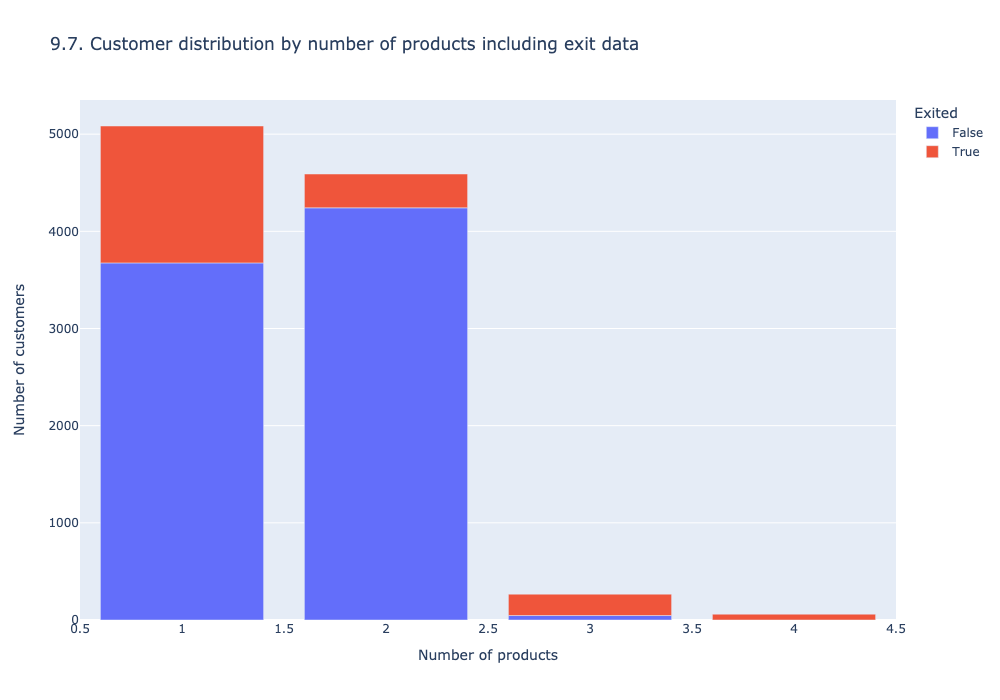

In [9]:
# 9.7. How does exit rate depend on the number of products, which a customer bought from the bank?
# To answer this question build a multilevel bar chart.

product_data = churn_data.groupby(['NumOfProducts', 'Exited'], as_index=False)['RowNumber'].count()

fig = px.bar(
    data_frame=product_data,
    x='NumOfProducts',
    y='RowNumber',
    color='Exited',
    width=1000,
    height=700,
    title='9.7. Customer distribution by number of products including exit data'
).update_layout(
    xaxis_title='Number of products',
    yaxis_title='Number of customers'
)
fig.show('png')

The chart above shows that customers who bought 3 or 4 products are very likely to exit the relationship with the bank.

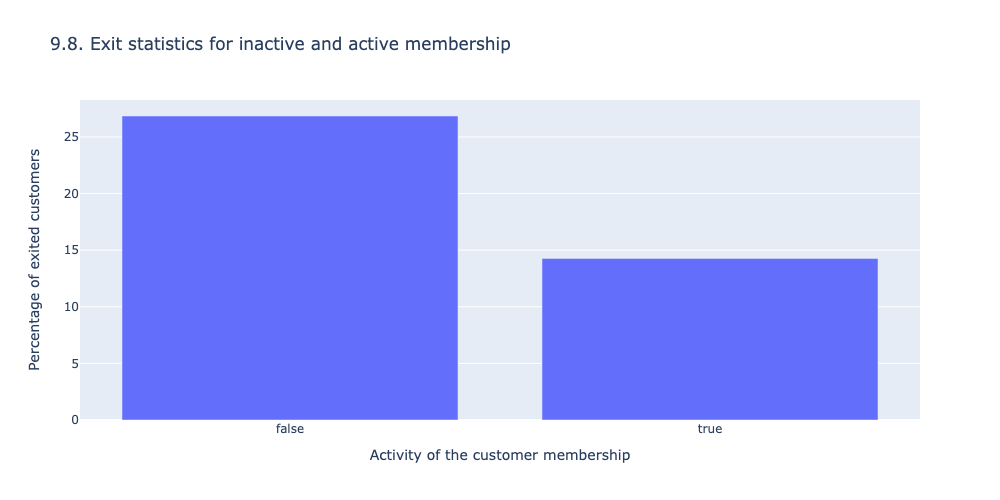

In [10]:
# 9.8. What is the relation between the active membership of the customer and the exit rate?
# Build a diagram representing this relation. What would you offer to the bank to reduce the churn rate among inactive members?

# Converting to bool for more appropriate description in the legend.
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].astype('bool')

member_data = churn_data.groupby(['IsActiveMember'], as_index=False)['Exited'].mean()
member_data['Exited'] = member_data['Exited'] * 100

fig = px.bar(
    data_frame=member_data,
    x='IsActiveMember',
    y='Exited',
    width=1000,
    height=500,
    title='9.8. Exit statistics for inactive and active membership'
).update_layout(
    xaxis_title='Activity of the customer membership',
    yaxis_title='Percentage of exited customers'
)
fig.show('png')

The chart above shows that the percentage of exited customers is almost double among inactive customers.

I would recommend the bank to activate the currently not exited inactive customer relationships by offering them special conditiona or any other bonuses.

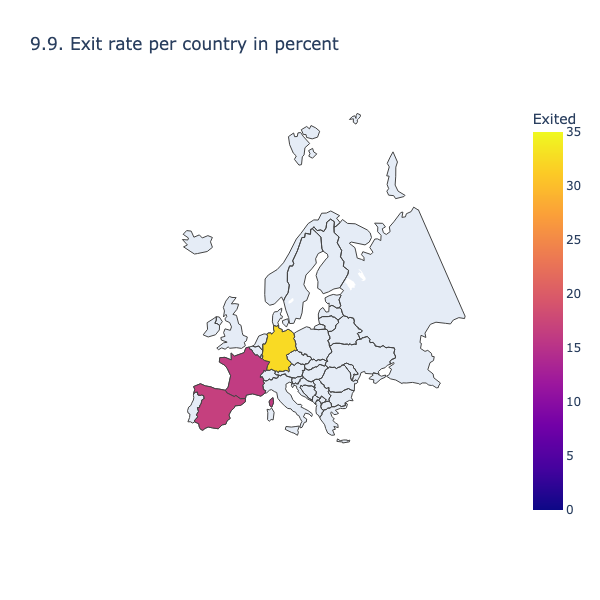

In [11]:
# 9.9. In which country is the exit rate higher?
# Build a heat map which shows this relation on the world map. Make an assumption on what can be the reason for that.

geo_data = churn_data.groupby(['Geography'], as_index=False)['Exited'].mean()
geo_data['Exited'] = geo_data['Exited'] * 100

fig = px.choropleth(
    data_frame=geo_data,
    locations='Geography',
    locationmode='country names',
    color='Exited',
    scope='europe',
    range_color=[0, 35],
    width=600,
    height=600,
    title='9.9. Exit rate per country in percent'
)
fig.show('png')

The chart above shows that the exit rate in Germany is the highest. The exit rates in Spain and France are very close to each other and much lower than in Germany.

I assume that this can be related to a higher competition in Germany. Alternatively the reason can be a better product offering in Spain and France.

In [12]:
# 9.10. Convert the numeric attribute 'CreditScore' to a categorical one.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"


churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreCat
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,True,101348.88,True,Fair
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,True,112542.58,False,Fair
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,False,113931.57,True,Poor
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,False,93826.63,False,Good
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,True,79084.10,False,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,False,96270.64,False,Good
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,True,101699.77,False,Poor
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,True,42085.58,True,Good
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,False,92888.52,True,Good


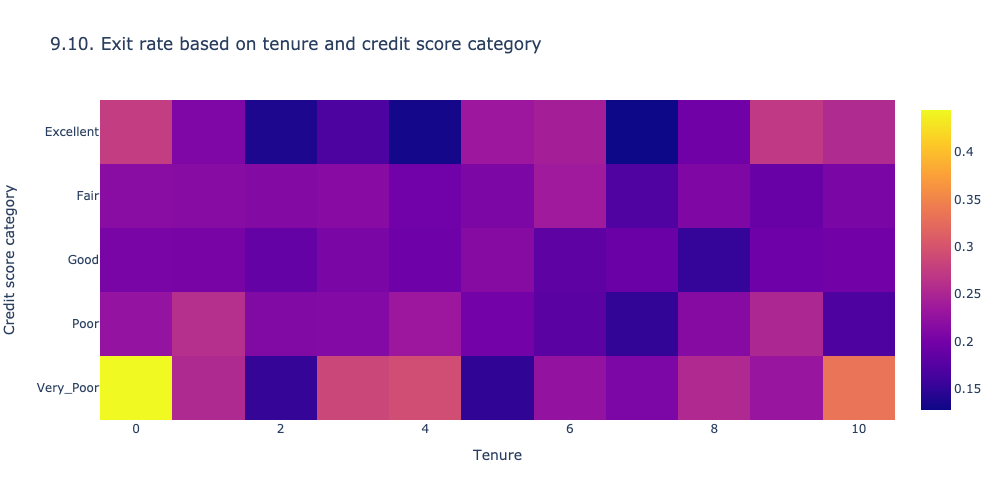

In [13]:
# 9.10. Build a pivot table with 'CreditScoreCat' as rows and 'Tenure' as columns. In the cells put the mean value for the attribute 'Exited'.
# Based on the pivot table build an annotated heat map. On the heat map find the customer categories which exit most frequently.

pivot = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
)

fig = px.imshow(
    pivot,
    width=1000,
    height=500,
    title='9.10. Exit rate based on tenure and credit score category'
).update_layout(
    yaxis_title='Credit score category'
)
fig.show('png')

High exit rate is observed for the "Very_Poor" rating, for customers with 0, 3, 4 and 10 years tenure. 0 can be explained in a way that the bank directly colses the account with a new customer having such low rating. Tenures of 3, 4 and 10 years might mean that the credit score goes down after some years and the bank actively closes such accounts.

Also high exit rate is observed for the "Excellent" credit score with tenure of 0 and 9 years. 0 years might mean that the new customers are unsatisfied with the bank services and exit the customer relationship with the bank. 9 might mean that they get some savings on the account across the years and from the charts above we know that the bank probably does not have good products for savings. Such customers might exit and switch to a cometition offering better conditions for savings accounts.

## Conclusions

The bank has increased exit rate for the following categories of customers:
- Customers at the age of 38 years old and higher
- Customers with savings accounts
- Women customers
- Customers owning 3 or 4 products with the bank
- Inactive members
- Customers from Germany

My recommendation to the bank would be to make targeted special offeres to the customers belonging to these categories. Investigation of the competitors offers can be very usesful. Since the customers are not leaving to nowhere (they are most probably leaving to a different bank), the bank should bring the conditions closer to the competition at least for the mentioned customer categories. By exceeding the competitors conditions the bank can count on customers switching from other banks.